# Getting started with the time series data

In [84]:
from numpy import *
import pandas as pd
from matplotlib.pyplot import *
from Functions import *
import warnings
warnings.filterwarnings("ignore")

In [85]:
Data = array(pd.read_csv('Data.csv',header=None))
Data_orig = Data
Data.shape

(43013, 18)

To get the number of time series in the dataset, we have to look at the unique ids in the data. Since column 2 contains the ids, so looking for number of unique values in that column

In [86]:
## The command below gives the total number of time series in the dataset
print('Total number of time series in the dataset: '+str(len(set(Data[:,1]))))  

Total number of time series in the dataset: 2789


Therefore, there are 43013 data enteries in the original dataset. This dataset 'Data' contains each observations in every time series as a new data point, so the number of datapoints are this large. The total number of time series are shown to be 2789. Now we will be visualizing the locations of the time series in the original dataset provided. Notice the locations of time series represent the patterns in which the satellite moved over this region to collect data. 

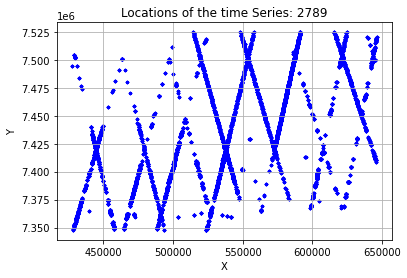

In [87]:
x = Data[:,3] ## x coordinate is in the 4rd column
y = Data[:,4] ## y coordinate is in the 5th column
scatter(x,y,color  = 'b',s = 5)
grid('on')
xlabel('X')
ylabel('Y')
title('Locations of the time Series: '+str(len(set(Data[:,1]))))
show()

#### There are 18 columns in total.

The columns of the Data array have the following headers:
1. Serial Number
2. PointID
3. Number of Points
4. X 
5. Y
6. Z
7. Kappa 
8. SIgma
9. Fitting Error
10. Date in decimal years
11. Calendar Date (MDDYY or MMDDYY)
12. Number of months relative to reference time period: August 31, 2006
13. Surface elevation relative to reference elevation (m)
14. Surface elevation error (m)
15. Firn Densification Model from RACMOGR2.3 (m)
16. Ice thickness change due to ice dynamics relative to reference elevation, surface elevation change minus FDM (m)
17. Outlier flag, surface elevation change time series (0 or 1)
18. Outlier flag, ice thickness change due to ice dynamics (0 or 1)

## Project description

In the Data object, the individual time series can be identified by their unique id in column 2. So use that id to sample the rows corresponding to a particular time series. The time instances for observations are in column 10 . Extract the corresponding height from column 16.

#### Plotting a sample time series from data (the first time series)

In [88]:
ids = sorted(set(Data[:,1])) ## getting unique time series ids in the dataset
ids[0]
size(ids)

2789

In [89]:
t = Data[Data[:,1] == ids[2],9]  ## time instances corresponding to this id
h = Data[Data[:,1] == ids[2],15] ## corresponding height measurements

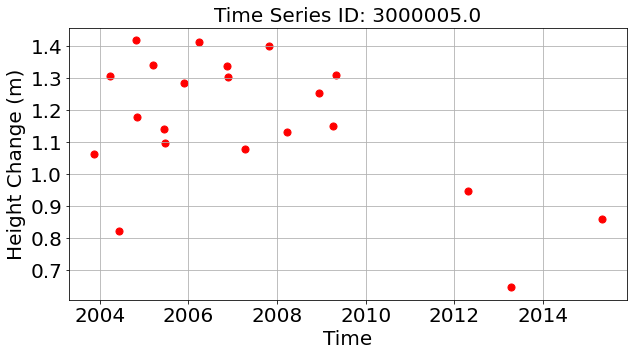

In [90]:
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(t,h,s = 50,color = 'r')
xticks(size = 20)
yticks(size = 20)
xlabel('Time',size = 20)
ylabel('Height Change (m)',size = 20)
ax.set_title('Time Series ID: '+str(ids[0]),size = 20)
grid(True)
show()

## Using the code for ALPS (Paper I shared) to predict height change at 2012

Here for the data points in the scatter plot above, we dont have an observation at 2012. Here I am showing one example of how you can use the code from that paper to predict at 2012. Use the same procedure to predict at any required time instance for all time series. 

#### Firsty showing the full approximation with bounds

In [91]:
Data = np.concatenate((t.reshape(-1,1),h.reshape(-1,1)),axis = 1)
Data

array([[2.0038778e+03, 1.0620000e+00],
       [2.0042195e+03, 1.3050000e+00],
       [2.0044390e+03, 8.2100000e-01],
       [2.0048195e+03, 1.4180000e+00],
       [2.0048417e+03, 1.1770000e+00],
       [2.0052000e+03, 1.3420000e+00],
       [2.0054473e+03, 1.1410000e+00],
       [2.0054723e+03, 1.0980000e+00],
       [2.0058917e+03, 1.2840000e+00],
       [2.0062361e+03, 1.4140000e+00],
       [2.0068750e+03, 1.3390000e+00],
       [2.0069000e+03, 1.3040000e+00],
       [2.0072806e+03, 1.0770000e+00],
       [2.0078140e+03, 1.4010000e+00],
       [2.0082195e+03, 1.1320000e+00],
       [2.0089556e+03, 1.2520000e+00],
       [2.0092500e+03, 1.1490000e+00],
       [2.0093334e+03, 1.3110000e+00],
       [2.0123111e+03, 9.4800000e-01],
       [2.0132723e+03, 6.4500000e-01],
       [2.0153250e+03, 8.5900000e-01]])

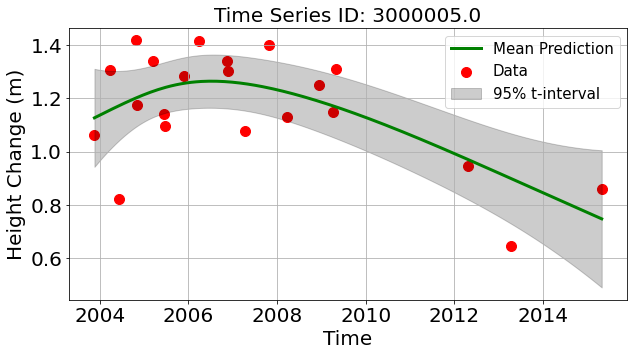

In [92]:
#figure(figsize=(20,8))
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
####### Scatter plot for the smaller time series
p = 4;q=2
scatter(t,h,color = 'r',s = 100,label = 'Data')
[n,lamb,sigmasq] = full_search_nk(Data,p,q)
c = n+p
U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
P = Penalty_p(q,c)
theta = np.linalg.solve(B.T.dot(B) + lamb*P, B.T.dot(Data[:,1].reshape(-1,1)))
### Getting mean of the prediction
num = 200
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
ypred1 = Bpred.dot(theta)
std_t1,std_n1 = Var_bounds(Data,Bpred,B,theta,P,lamb)


ax.plot(xpred,ypred1,linewidth=3,color = 'g',label = 'Mean Prediction')
ax.set_title('Time Series ID: '+str(ids[0]),size = 20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Time',size=20)
ax.set_ylabel('Height Change (m)',size = 20)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.legend(fontsize=15)
ax.grid(True)
show()

#### Predicting at t = 2012

In [93]:
xpred_2012 = np.array([2006])
Bpred_2012 = Basis_Pspline(n,p,U,xpred_2012)
ypred_2012 = Bpred_2012.dot(theta)
print('The prediction of height change at t = 2012: ',ypred_2012)

The prediction of height change at t = 2012:  [[1.25922162]]


#### Showing this prediction on the graph

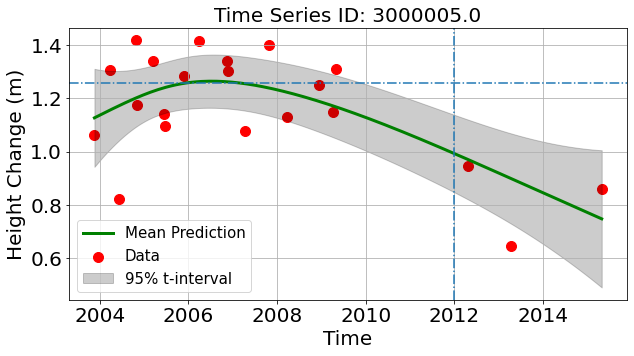

In [94]:
# Plotting code same as before
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(t,h,color = 'r',s = 100,label = 'Data')
ax.plot(xpred,ypred1,linewidth=3,color = 'g',label = 'Mean Prediction')
ax.set_title('Time Series ID: '+str(ids[0]),size = 20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Time',size=20)
ax.set_ylabel('Height Change (m)',size = 20)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.legend(fontsize=15)
ax.grid(True)

## adding the predicting at 2012
axvline(x = 2012,linestyle = '-.')
axhline(y = ypred_2012,linestyle = '-.')
show()

## Things to do next

1. For each time series in the dataset, make a prediction at 2006 using the same procedure as above
2. Save it into a new file dat_2006.csv. It will have rows equal to the number of time series in the dataset (2789). It will have 3 columns
    1. X coordinate of time series
    2. Y coordinate of time series
    3. Height Prediction at t = 2006
3. Once you have constructed this dat_2006.csv. Start working on the Spatial regression model which will be able to predict the height change at any new X, Y coordinate.

In [95]:
## Code to create file dat_2006.csv

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
#lasso regression
dat2006 = array(pd.read_csv('dat_2006.csv',header=0))
coord = dat2006[:,:2] ## coordinates (rows 1 and 2 frome csv)
h = dat2006[:,2] ## y coordinate

#define lasso model
model = Lasso(alpha=0.01)
model.fit(coord, h)

for i in range(20):
    test = [coord[i]]
    predicted_val = model.predict(test)
    error = (  abs(h[i] - predicted_val ) / predicted_val) * 100
    print( 'model predicted:', predicted_val[0] , '\tactual value:', h[i], '\tpercent error:',  error[0], '%' )

model predicted: 2.1233774012599227 	actual value: 2.873001847836609 	percent error: 35.303401370471896 %
model predicted: 1.1962478296237862 	actual value: 0.9796123492099572 	percent error: 18.109581898423148 %
model predicted: 1.3865600354042584 	actual value: 1.2592216062260075 	percent error: 9.183766005568215 %
model predicted: 1.5847709785871587 	actual value: 1.4952309658144562 	percent error: 5.650028551919113 %
model predicted: 1.196660095257144 	actual value: 0.9618294790184976 	percent error: 19.623836139383 %
model predicted: 1.263811534514609 	actual value: 0.188942066868406 	percent error: 85.04982256385459 %
model predicted: 1.3876271425167275 	actual value: 1.2736034017523572 	percent error: 8.217174287724466 %
model predicted: 1.585774665405836 	actual value: 1.4541117266335304 	percent error: 8.302752064626413 %
model predicted: 1.1969611459239573 	actual value: 0.9568647967306978 	percent error: 20.058825636142476 %
model predicted: 3.509389487286665 	actual value: 

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
#lasso regression
dat2006 = array(pd.read_csv('dat_2006.csv',header=0))
coord = dat2006[:,:2] ## coordinates (rows 1 and 2 frome csv)
h = dat2006[:,2] ## y coordinate

#define lasso model
ridge_model = Ridge(alpha=0.9)
ridge_model.fit(coord, h)

for i in range(20):
    test = [coord[i]]
    predicted_val = ridge_model.predict(test)
    error = (  abs(h[i] - predicted_val ) / predicted_val) * 100
    print( 'model predicted:', predicted_val[0] , '\tactual value:', h[i], '\tpercent error:',  error[0], '%' )

model predicted: 2.1233617640859563 	actual value: 2.873001847836609 	percent error: 35.30439779174182 %
model predicted: 1.1962343600048868 	actual value: 0.9796123492099572 	percent error: 18.108659810945795 %
model predicted: 1.3865583228890728 	actual value: 1.2592216062260075 	percent error: 9.183653839943984 %
model predicted: 1.5847823523972338 	actual value: 1.4952309658144562 	percent error: 5.650705691372502 %
model predicted: 1.1966463412782886 	actual value: 0.9618294790184976 	percent error: 19.62291231417242 %
model predicted: 1.2638024152703835 	actual value: 0.188942066868406 	percent error: 85.0497146875619 %
model predicted: 1.3876253948033792 	actual value: 1.2736034017523572 	percent error: 8.21705868731081 %
model predicted: 1.585785819769903 	actual value: 1.4541117266335304 	percent error: 8.303397059981187 %
model predicted: 1.1969472114610866 	actual value: 0.9568647967306978 	percent error: 20.05789498747615 %
model predicted: 3.509465365090211 	actual value: 

In [98]:
print('end')

end


## Linear Regression Test

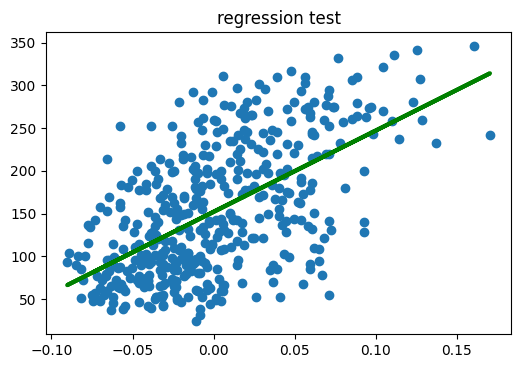

In [99]:
import sklearn.datasets

class LinearRegressionTest():
    def __init__(self):
        pass
    
    # the function is theta = (X^t * X) ^-1 * y
    def fit(self, X, y):
        # prepends a vector of 1's before the input X
        X_Matrix = c_[ones((X.shape[0],1)), X]
        
        # theta = (X^t * X) ^-1 * y
        self.theta = linalg.inv(X_Matrix.T.dot(X_Matrix)).dot(X_Matrix.T).dot(y)
        
    def predict(self, X):
        return c_[ones((X.shape[0],1)), X].dot(self.theta)
    
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X = X[:, newaxis, 2]
lin = LinearRegressionTest()
lin.fit(X,y)
y_pred = lin.predict(X)
x_pred = X

# print(X)


fig, axe = subplots(dpi = 100)
axe.scatter(X, y, marker='o')
axe.set_title("regression test")
fig.savefig("img.png")
axe.plot(x_pred,y_pred,linewidth=3,color = 'g',label = 'Mean Prediction')

show(fig)
        

## Ridge Regression Test

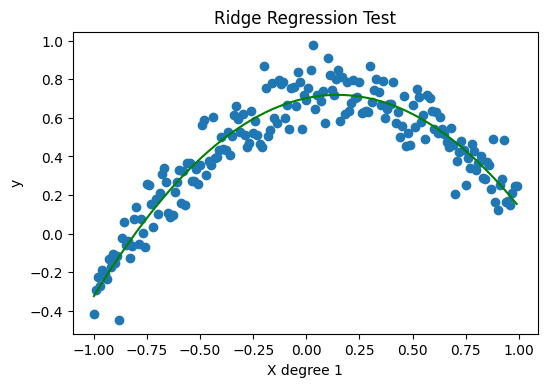

In [100]:
import sklearn.datasets
from sklearn.preprocessing import PolynomialFeatures

class RidgeRegressionTest():
    def __init__(self, alpha):
        self.alpha = alpha
    
    # the function is theta = (X^T * X + A)^-1 (X^t * y)
    # A is a modified (I * A) where A at (0, 0) is = 0
    def fit(self, X, y):
        # prepends a vector of 1's before the input X
        X_Matrix = c_[ones((X.shape[0],1)), X]
        A = self.alpha * identity(X_Matrix.shape[1])
        A[0,0] = 0
        
        # theta = (X^t * X) ^-1 * y
        self.theta = linalg.inv(X_Matrix.T.dot(X_Matrix) + A).dot(X_Matrix.T).dot(y)
        
    def predict(self, X):
        return c_[ones((X.shape[0],1)), X].dot(self.theta)

    
def make_x_y(deg=2):
  """ Return random X and y predictions, with X having polynomial features of degree
  deg for purpose of visualizing effects of alpha parameter"""
  
  X = np.array([*range(-100,100)]).reshape(-1,1) / 100

  poly_adder = PolynomialFeatures(degree=deg)
  X = poly_adder.fit_transform(X)

  thetas = np.array(np.random.randn(deg+1,1)).reshape(-1,1)

  y = X.dot(thetas)
  y += np.random.normal(loc=0, scale=.1, size=(len(y),1))
  return X, y

ridge = RidgeRegressionTest(0.00001)
X, y = make_x_y(2)
ridge.fit(X, y)

y_pred = ridge.predict(X)
x_pred = X

fig2, axe2 = subplots(dpi = 100)
axe2.set_title("Ridge Regression Test")

axe2.scatter(X[:, 1], y)
axe2.plot(X[:, 1], y_pred, color='green')
axe2.set_ylabel('y')
axe2.set_xlabel(f'X degree {1}')

show(fig2)


## Model Testing Function

In [112]:
def testModel(X, y, model):
    summ = 0.0

    model.fit(coord[(len(coord)//2):], h[(len(coord)//2):])
    predicted = model.predict(coord[:(len(coord)//2)])
    score = (sum(sqrt(pow(predicted-h[(len(coord)//2)+1:],2))))/len(predicted)
    print("average difference after 50% trained 50% tested:\t", score)
    summ += score

    model.fit(coord[int((len(coord)//1.666)):], h[int((len(coord)//1.666)):])
    predicted = model.predict(coord[:(int(len(coord)//1.666))])
    score = (sum(sqrt(pow(predicted-h[:(int(len(coord)//1.666))],2)))/len(predicted))
    print("average difference after 60% trained 40% tested:\t", score)
    summ += score

    model.fit(coord[int((len(coord)//1.429)):], h[(int(len(coord)//1.429)):])
    predicted = model.predict(coord[:(int(len(coord)//1.429))])
    score = (sum(sqrt(pow(predicted-h[:int((len(coord)//1.429))],2)))/len(predicted))
    print("average difference after 70% trained 30% tested:\t", score)
    summ += score

    model.fit(coord[int((len(coord)//1.25)):], h[int((len(coord)//1.25)):])
    predicted = model.predict(coord[:int((len(coord)//1.25))])
    score = (sum(sqrt(pow(predicted-h[:int((len(coord)//1.25))],2)))/len(predicted))
    print("average difference after 80% trained 20% tested:\t", score)
    summ += score

    model.fit(coord[int((len(coord)//1.111)):], h[int((len(coord)//1.111)):])
    predicted = model.predict(coord[:int((len(coord)//1.111))])
    score = (sum(sqrt(pow(predicted-h[:int((len(coord)//1.111))],2)))/len(predicted))
    print("average difference after 90% trained 10% tested:\t", score)
    summ += score

    print("total average MSE:\t", summ/5)

In [113]:
dat2006 = array(pd.read_csv('dat_2006.csv',header=0))
coord = dat2006[:,:2] ## coordinates (rows 1 and 2 frome csv)
h = dat2006[:,2] ## y coordinate

ridge = RidgeRegressionTest(0.000001)
linear = LinearRegressionTest()
lasso = Lasso(alpha=1)

testModel(coord, h, ridge)
print("\n")

testModel(coord, h, linear)
print("\n")

testModel(coord, h, lasso)

average difference after 50% trained 50% tested:	 1.8440091916630892
average difference after 60% trained 40% tested:	 1.7628918623253913
average difference after 70% trained 30% tested:	 1.5339040113118385
average difference after 80% trained 20% tested:	 1.3696328805856843
average difference after 90% trained 10% tested:	 1.1912960906495786
total average MSE:	 1.5403468073071165


average difference after 50% trained 50% tested:	 1.8440091916590478
average difference after 60% trained 40% tested:	 1.7628918623255634
average difference after 70% trained 30% tested:	 1.533904011314623
average difference after 80% trained 20% tested:	 1.3696328805849722
average difference after 90% trained 10% tested:	 1.191296090651944
total average MSE:	 1.54034680730723


average difference after 50% trained 50% tested:	 1.8435922540109764
average difference after 60% trained 40% tested:	 1.7685539989340828
average difference after 70% trained 30% tested:	 1.5389748207075156
average difference after 